Solution to Hw2 part 1, the linear charge density:

In [1]:
import numpy,scipy

dim = dimensions of x&y plane to explore the potential, points = number of points in one dimension of the grid

In [2]:
dim=5
points=12

In [3]:
xgrid=numpy.linspace(-dim,dim,points)
ygrid=numpy.linspace(-dim,dim,points)
zgrid=numpy.linspace(-dim,dim,points)

this is the integrand for the  linear charge density:

In [4]:
f = lambda a,b,c,x: 2*x/numpy.sqrt((a-x)**2+b**2+c**2)

In [5]:
import scipy.integrate as sci
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
V=numpy.zeros((len(xgrid),len(ygrid)))
for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
           # for k in range(points):
           #     c=zgrid[k]
            g= lambda x: f(a,b,0,x)
            vabc=sci.quad(g,0,1)[0]
            V[i][j]=vabc

In [7]:
#Vxy=numpy.zeros((len(xgrid),len(ygrid)))
#Vxy[i][j]=V[i][j][0]

In [8]:
#Vxy=numpy.zeros((len(xgrid),len(ygrid)))
#for i in range (points):
#    for j in range(points):
#        Vxy[i][j]=V[i][j][0]

Text(0.5,0.92,'linear charge potential')

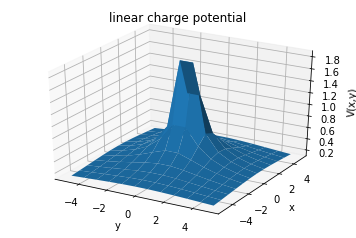

In [9]:
X,Y=numpy.meshgrid(xgrid,ygrid)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, V)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('V(x,y)')
ax.set_title('linear charge potential in xy plane')



This is the potenial in xy plane for the linear charge density, and it should be the same plot for all planes passing 
through the x axis as the charge distribution is symmetric around the x axis

In [10]:
#[Ex,Ey]=numpy.gradient(-V)
V1=numpy.zeros(len(xgrid))
V2=numpy.zeros(len(ygrid))
Ex=-numpy.diff(V)/numpy.diff(xgrid)
Ey=-numpy.diff(V)/numpy.diff(ygrid)


In [11]:
len(Ex)

12

In [12]:
h=2*dim/points
Ex=[]
Ey=[]
#Ez=[] 
for i in range(points-1):
    for j in range(points-1):
       # for k in range(points-1):
        Ex.append(-(V[i+1][j]-V[i][j])/h)
        Ey.append(-(V[i][j+1]-V[i][j])/h)
        #   Ez.append(-(V[i][j][k+1]-V[i][j][k])/h)

In [13]:
X,Y=numpy.meshgrid(xgrid,ygrid)

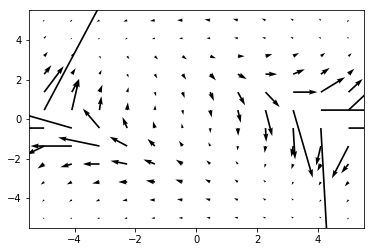

In [14]:
fig, ax = plt.subplots()
q = ax.quiver(X, Y, Ex, Ey)

In [15]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.quiver(X,Y,Z,Ex,Ey,Ez)

Now we turn to the second charge distribution: L shaped

In [16]:
f1= lambda a,b,c,x: x**2/numpy.sqrt((a-x)**2+b**2+c**2)

In [17]:
f2= lambda a,b,c,y: y/numpy.sqrt(a**2+(b-y)**2+c**2)

In [18]:
V=numpy.zeros((len(xgrid),len(ygrid)))
for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
           # for k in range(points):
           #     c=zgrid[k]
            g1= lambda x: f1(a,b,0,x)
            g2= lambda y: f2(a,b,0,y)
            vabc=sci.quad(g1,0,1)[0]+sci.quad(g2,1,2)[0]
            V[i][j]=vabc

Text(0.5,0.92,'L configuration potential')

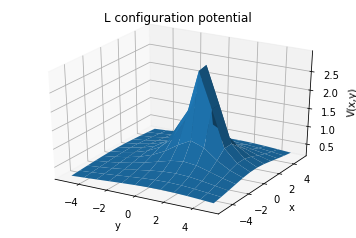

In [19]:
X,Y=numpy.meshgrid(xgrid,ygrid)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y, V)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('V(x,y)')
ax.set_title('L configuration potential in xy plane')

For the disk charge distribution :

In [20]:
f= lambda a,b,c,x,y: x/numpy.sqrt((a-x)**2+(b-y)**2+c**2)

In [21]:
V=numpy.zeros((len(xgrid),len(ygrid)))
for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
           # for k in range(points):
           #     c=zgrid[k]
            g1= lambda x,y: f(a,b,0,x,y)
            vabc=sci.dblquad(g1,-2,2,lambda x:-numpy.sqrt(4-x**2),lambda x:numpy.sqrt(4-x**2))[0]
            V[i][j]=vabc

Text(0.5,0.92,'Disc potential')

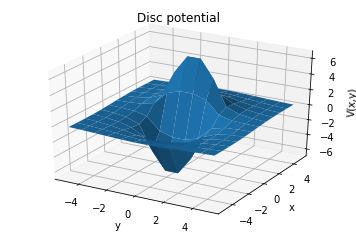

In [22]:
X,Y=numpy.meshgrid(xgrid,ygrid)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y, V)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('V(x,y)')
ax.set_title('Disc potential in xy plane')
